#Model Development and Evaluation

In this notebook, we will develop and evaluate supervised machine learning models to classify colorectal cancer tumors into early (Stage I–II) or advanced (Stage III–IV) stages based solely on selected miRNA expression profiles.

The dataset used for training and evaluation will be one of the data frames generated during the outlier handling phase. Among all of them, the capped dataset achieved the highest classification accuracy and will be prioritized.

Models to be Evaluated:

Logistic Regression

Support Vector Machine (SVM)

K-Nearest Neighbors (KNN)

Each model will be trained and tested using appropriate data splits. Performance will be evaluated primarily through confusion matrices, and classification reports.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Defining the confusion matrix plotting function
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Stage I-II', 'Stage III-IV']); ax.yaxis.set_ticklabels(['Stage I-II', 'Stages III-IV'])
    plt.show()

In [ ]:
# Reading the capped df (can be anyone of the previously obtained)
df_mir_expression = pd.read_csv('df_mir_new_capped.csv', index_col='File_ID')
df_mir_expression.head()

,hsa-mir-29a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-145,hsa-mir-149,hsa-mir-1246,hsa-mir-4488,hsa-mir-492,hsa-mir-200a,hsa-mir-338,...,hsa-mir-424,hsa-mir-210,hsa-mir-200b,hsa-mir-200c,hsa-mir-141,hsa-mir-135b,hsa-mir-218-1,hsa-mir-218-2,hsa-mir-429,Stages_encoded
File_ID,,,,,,,,,,,,,,,,,,,,,
3cd62167-7962-44ea-8923-6e9c7fc97807.mirbase21.isoforms.quantification.txt,6433.475,96.445,100.829,2455.026,3.705,0.000,0.0,0.062,1066.082,147.755,...,258.401,290.508,1034.098,6698.112,589.661,31.366,9.015,8.274,174.243,0
ef4cd175-6f73-4360-b2c6-71b424d64f53.mirbase21.isoforms.quantification.txt,6301.933,79.897,79.763,1111.711,5.908,0.269,0.0,0.000,2083.501,975.416,...,522.890,1422.840,2178.169,13660.925,2378.785,143.143,2.551,1.611,321.468,0
98694eb1-1282-4426-8fb2-001ac8190323.mirbase21.isoforms.quantification.txt,5633.066,87.079,91.507,2537.585,1.968,0.492,0.0,0.492,3693.225,139.720,...,175.142,719.753,2745.689,12168.406,3105.812,121.517,1.476,3.444,573.146,0
a6f1d4ee-b216-4b96-95a6-5705662254d7.mirbase21.isoforms.quantification.txt,17290.156,151.468,158.526,3408.302,54.561,0.000,0.0,0.000,3575.242,388.714,...,130.838,69.491,4080.136,17627.566,3576.600,234.260,7.872,6.515,585.513,0
e3f4c57a-45e8-4dd6-96b1-e12ba2bdb415.mirbase21.isoforms.quantification.txt,9060.427,85.355,81.798,1135.932,4.268,0.000,0.0,0.000,2634.623,522.088,...,103.849,396.189,1672.246,12480.315,2198.601,135.145,9.958,4.979,233.304,0


# Data pre-processing

In [ ]:
# Assigning columns to the X and y variables
y = df_mir_expression['Stages_encoded'].to_numpy()
X = df_mir_expression.drop('Stages_encoded', axis=1)
# Standarizing the miRNA expression features
st = StandardScaler()
X = st.fit_transform(X)

In [ ]:
# Dividing into test and train sub-sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Logistic-Regression, SVMs and KNN model building

In [ ]:
# Building the pipeline with the feature selector
pipe_lr = Pipeline([('lda',LinearDiscriminantAnalysis()),('lr', LogisticRegression())])
# Establishing parameters
lr_parameters ={'lda__n_components':[1],"lr__C":[0.01,0.1,1],'lr__penalty':['l2'], 'lr__solver':['lbfgs']}
# Building the grid search object with the pipeline and parameters
grid_lr = GridSearchCV(pipe_lr, lr_parameters, cv=10)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('lda', LinearDiscriminantAnalysis()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lda__n_components': [1], 'lr__C': [0.01, 0.1, 1],
                         'lr__penalty': ['l2'], 'lr__solver': ['lbfgs']})

In [ ]:
# Building the pipeline
svm_pipe = Pipeline([('svm', SVC())])
# Establishing parameters
svm_parameters = {'svm__C':[0.01, 0.1, 1], 'svm__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'svm__gamma':[0.001, 0.01, 0.1, 1],}
# Building the grid search object with the pipeline and parameters
grid_svm = GridSearchCV(svm_pipe, svm_parameters, cv=10, error_score='raise')
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 1],
                         'svm__gamma': [0.001, 0.01, 0.1, 1],
                         'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# Building de pipeline with feature transformation algorithm neighborhood component analysis
knn_pipe = Pipeline([('nca', NeighborhoodComponentsAnalysis()), ('knn', KNeighborsClassifier())])
# Establishing parameters
knn_parameters ={'nca__n_components': [1, 2, 3, 4, 5], 'knn__n_neighbors':[1, 2, 3, 4, 5], 'knn__weights':['uniform', 'distance'], 'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
# Building the grid search object with the pipeline and parameters
grid_knn = GridSearchCV(knn_pipe, knn_parameters, cv=10)
grid_knn.fit(X_train, y_train)

np.float64(0.5414406779661018)

#Model Evaluation

In [ ]:
# Evaluating best parameters from the hyperparameter grid search and the average accuracy score
for grid in [grid_lr, grid_svm, grid_knn]:
  print(grid.best_params_)
  print(grid.best_score_)

{'lda__n_components': 1, 'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
0.5446610169491526
{'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'poly'}
0.5534180790960452
{'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'uniform', 'nca__n_components': 1}
0.5414406779661018


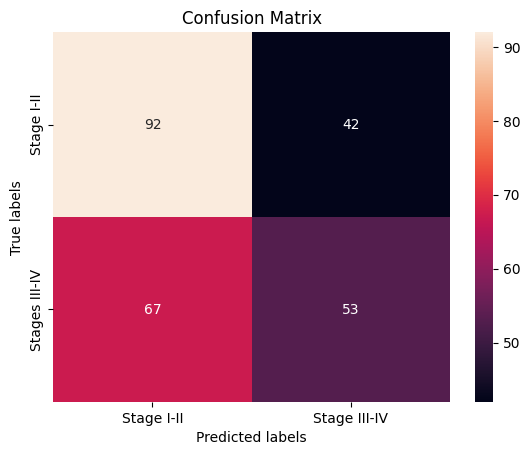

In [ ]:
# Plot the confusion matrix of the LogisticRegression model to visualize the mistakes distribution
yhat = grid_lr.predict(X_test)
plot_confusion_matrix(y_test, yhat)

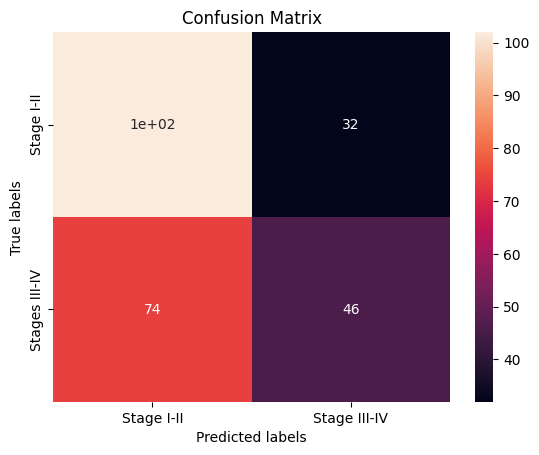

In [ ]:
# Plot the confusion matrix of the SVMs model to visualize the mistakes distribution
yhat_svm = grid_svm.predict(X_test)
plot_confusion_matrix(y_test, yhat_svm)

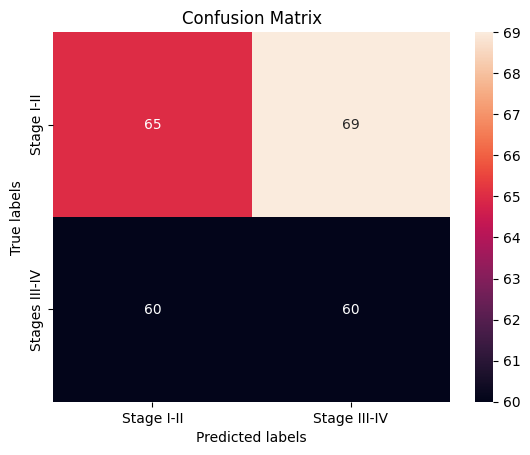

In [ ]:
# Plot the confusion matrix of the KNN model to visualize the mistakes distribution
yhat_knn = grid_knn.predict(X_test)
plot_confusion_matrix(y_test, yhat_knn)

# Classification report metrics: Recall
What we are trying to predict is whether a patient carries a stage I-II or stage III-IV tumor since the latest is more dangerous. The key metric when addressing this is recall, because is the rate between true positives and actual positives. A false negative in this context, true stage III-IV but classified as stage I-II, would imply a threat to a patient's life.

In [ ]:
# First we check the accuracy of the model when trying to classify on unseen data
print('Logistic Test Accuracy:', accuracy_score(y_test, yhat))
print('SVMs Test accuracy:', accuracy_score(y_test, yhat_svm))
print('KNN Test accuracy:', accuracy_score(y_test, yhat_knn))

Logistic Test Accuracy: 0.5708661417322834
SVMs Test accuracy: 0.5826771653543307
KNN Test accuracy: 0.4921259842519685


In [ ]:
# Then we check the classification report
print(classification_report(y_test, yhat))
print(classification_report(y_test, yhat_svm))
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63       134
           1       0.56      0.44      0.49       120

    accuracy                           0.57       254
   macro avg       0.57      0.56      0.56       254
weighted avg       0.57      0.57      0.56       254

              precision    recall  f1-score   support

           0       0.58      0.76      0.66       134
           1       0.59      0.38      0.46       120

    accuracy                           0.58       254
   macro avg       0.58      0.57      0.56       254
weighted avg       0.58      0.58      0.57       254

              precision    recall  f1-score   support

           0       0.52      0.49      0.50       134
           1       0.47      0.50      0.48       120

    accuracy                           0.49       254
   macro avg       0.49      0.49      0.49       254
weighted avg       0.49      0.49      0.49       254



# Overfitting o Underfitting model analysis:
We can address whether the models are overfitted or underfitted by checking all the metrics using the training data subset. This way we can think about subsequent steps for improving accuracy.

In [ ]:
# Make predictions using the training sub set
yhat_lr_train = grid_lr.predict(X_train)
yhat_svm_train = grid_svm.predict(X_train)
yhat_knn_train = grid_knn.predict(X_train)

In [ ]:
# Check the accuracy on the model's predictions using the y training sub set
print('Logistic Regression training accuracy:', accuracy_score(y_train, yhat_lr_train))
print('SVMs training accuracy:', accuracy_score(y_train, yhat_svm_train))
print('KNN training accuracy:', accuracy_score(y_train, yhat_knn_train))

Logistic Regression training accuracy: 0.5922165820642978
SVMs training accuracy: 0.7901861252115059
KNN training accuracy: 0.7715736040609137


In [ ]:
# Finally, we evaluate the different types of mistakes done using the training sub set to make predictions
print('Logistic Regression training metrics')
print(classification_report(y_train, yhat_lr_train))
print('SVMs training metrics')
print(classification_report(y_train, yhat_svm_train))
print('KNN training metrics')
print(classification_report(y_train, yhat_knn_train))

Logistic Regression training metrics
              precision    recall  f1-score   support

           0       0.59      0.68      0.63       303
           1       0.60      0.50      0.55       288

    accuracy                           0.59       591
   macro avg       0.59      0.59      0.59       591
weighted avg       0.59      0.59      0.59       591

SVMs training metrics
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       303
           1       0.94      0.61      0.74       288

    accuracy                           0.79       591
   macro avg       0.83      0.79      0.78       591
weighted avg       0.83      0.79      0.78       591

KNN training metrics
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       303
           1       0.77      0.75      0.76       288

    accuracy                           0.77       591
   macro avg       0.77      0.77      0.77     

# Conclusion
In this project final step we explored the use of three supervised classifiers—Logistic Regression, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN)—to predict colorectal cancer stages based solely on miRNA expression profiles.

Our tasks to improve model accuracy and generalization were:

1- Multiple outlier-handled datasets were tested, including those processed using Isolation Forest, DBSCAN, One-Class SVM, and capping methods.

2- Feature selection and data transformation techniques were applied, particularly to boost the performance of KNN and Logistic Regression models.

3- Hyperparameter tuning combined with cross-validation was conducted to fine-tune each model and reduce the risk of overfitting.

Despite these efforts, the models did not achieve the desired level of accuracy. As a result, future work will focus on more powerful classification techniques. In particular, we will explore ensemble learning methods such as Random Forest and XGBoost, which may better capture complex, non-linear relationships in the data and improve predictive performance.